In [2]:
import pickle
import os
import math

filenames = ['chance1.0',
             'chance0.9', 'chance0.9_2', 'chance0.9_3',
             'chance0.8_run1', 'chance0.8_run2', 'chance0.8_run3',
             'chance0.7_run1', 'chance0.7_run2', 'chance0.7_run3',
             '0.6 first run', '0.6 second run', '0.6 third run',
             'chance0.5_run1', 'chance0.5_run2', 'chance0.5_run3']

chances = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
hist_data = dict()

for i, filename in enumerate(filenames):
    with open(os.path.join(os.getcwd(), f'runs\\{filename}.pkl'), 'rb') as file:
        chance = chances[math.floor((i + 2) / 3)]
        if not chance in hist_data:
            hist_data[chance] = []
        hist_data[chance].append(pickle.load(file))

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

hist_counts_0_5 = np.array(hist_data[0.5]).mean(axis = 0)
hist_counts_0_6 = np.array(hist_data[0.6]).mean(axis = 0)
hist_counts_0_7 = np.array(hist_data[0.7]).mean(axis = 0)
hist_counts_0_8 = np.array(hist_data[0.8]).mean(axis = 0)
hist_counts_0_9 = np.array(hist_data[0.9]).mean(axis = 0)
hist_counts_1_0 = np.array(hist_data[1.0]).mean(axis = 0)

data = {'0.5':  hist_counts_0_5[:, 0],
        '0.6':  hist_counts_0_6[:, 0],
        '0.7':  hist_counts_0_7[:, 0],
        '0.8':  hist_counts_0_8[:, 0],
        '0.9':  hist_counts_0_9[:, 0],
        '1.0':  hist_counts_1_0[:, 0]
        }

df = pd.DataFrame(data)

corr_matrix = df.corr(method='kendall')
print(corr_matrix)

[[  0.   2.  10.  45. 117.]
 [  0.   2.  10.  39. 121.]
 [  0.   0.  10.  39. 110.]
 ...
 [  0.   0.   4.  24.  96.]
 [  0.   0.   2.  26.  86.]
 [  0.   0.   2.  26.  92.]]
          0.5       0.6       0.7       0.8       0.9       1.0
0.5  1.000000  0.601625  0.360292  0.269338  0.196752  0.199289
0.6  0.601625  1.000000  0.632679  0.384966  0.242822  0.210502
0.7  0.360292  0.632679  1.000000  0.619676  0.380869  0.323241
0.8  0.269338  0.384966  0.619676  1.000000  0.595289  0.470941
0.9  0.196752  0.242822  0.380869  0.595289  1.000000  0.791880
1.0  0.199289  0.210502  0.323241  0.470941  0.791880  1.000000


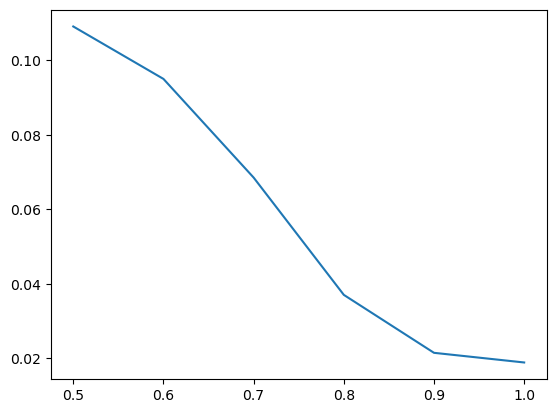

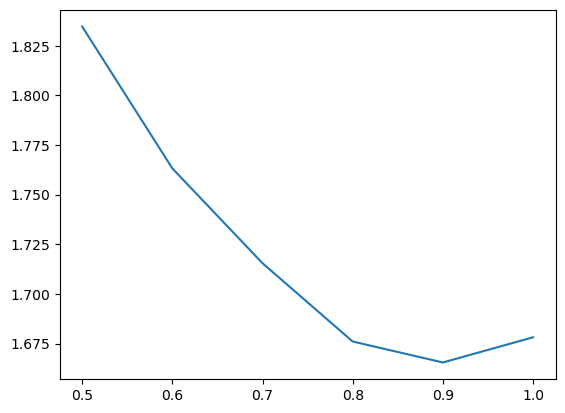

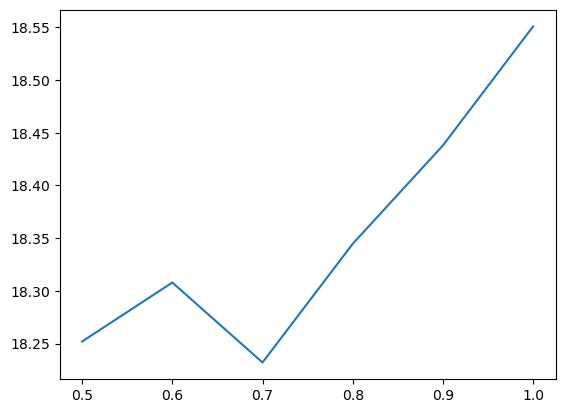

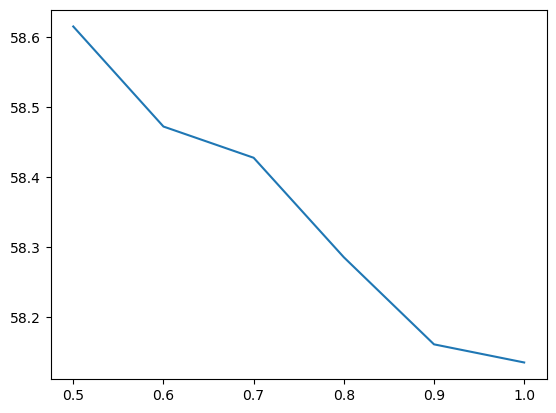

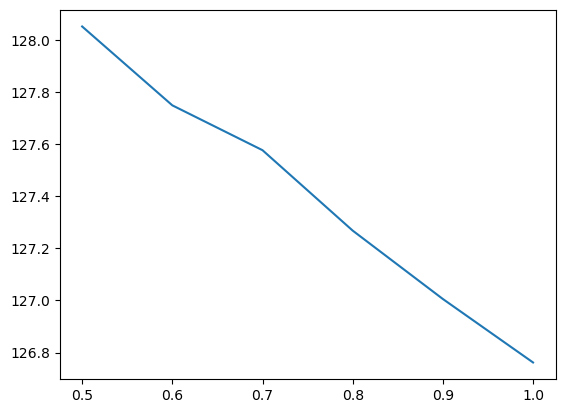

In [134]:
import matplotlib.pyplot as plt
import numpy as np

y = []
for chance in chances:
    y.append(np.array(hist_data[chance]).mean(axis = 0).mean(axis = 0))

for i in range(5):
    bin_y = np.array(y)[:, i]
    fig, ax = plt.subplots()
    ax.plot(chances, bin_y)